### Load from analysis.db

In [1]:
from activity_tracker.pipeline import models, measurement, subject, visit

import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_subject = subject.Subject.fetch(format="frame").reset_index()
df_visit = visit.Visit.fetch(format="frame").reset_index()
df_measurement = measurement.DailyMeasurement.fetch(format="frame").reset_index()

[2025-08-24 14:15:55,367][INFO]: DataJoint 0.14.4 connected to root@localhost:3306


In [2]:
subject.Subject()

"subject_id Subject identifier (e.g., MDE001)",group Study group assignment,sex Sex assigned at birth,age Age in years at enrollment,ethnicity Hispanic ethnicity,race Race category,monthly_income Monthly income in dollars,education Years of education,marital_status Marital status,living_situation Living situation
MDE001,control,m,83.0,non_hisp,black,3000.0,18.0,never_married,with_others
MDE002,exercise,m,61.0,non_hisp,white,1033.0,3.0,never_married,alone
MDE003,exercise,f,69.0,hisp,white,1349.0,13.0,widowed,with_family
MDE004,control,f,65.0,non_hisp,black,900.0,11.0,widowed,with_family
MDE005,control,f,84.0,non_hisp,black,792.0,3.0,widowed,with_family
MDE006,control,m,65.0,non_hisp,white,814.0,12.0,divorced,alone
MDE007,exercise,f,76.0,non_hisp,black,1004.0,7.0,widowed,alone
MDE008,control,f,87.0,non_hisp,black,1300.0,15.0,widowed,with_family
MDE009,control,m,64.0,non_hisp,black,2700.0,12.0,widowed,alone
MDE010,exercise,m,66.0,non_hisp,black,1260.0,12.0,married,with_spouse


In [3]:
# Measure days per subject
measure_days_df = df_measurement.groupby('subject_id').size().reset_index(name='measured_days').sort_values(by='measured_days', ascending=False)
measure_days_df

,subject_id,measured_days
24,MDE025,299
72,MDE074,288
41,MDE042,246
40,MDE041,246
85,MDE087,242
93,MDE095,214
95,MDE097,213
96,MDE098,211
87,MDE089,211
42,MDE044,206


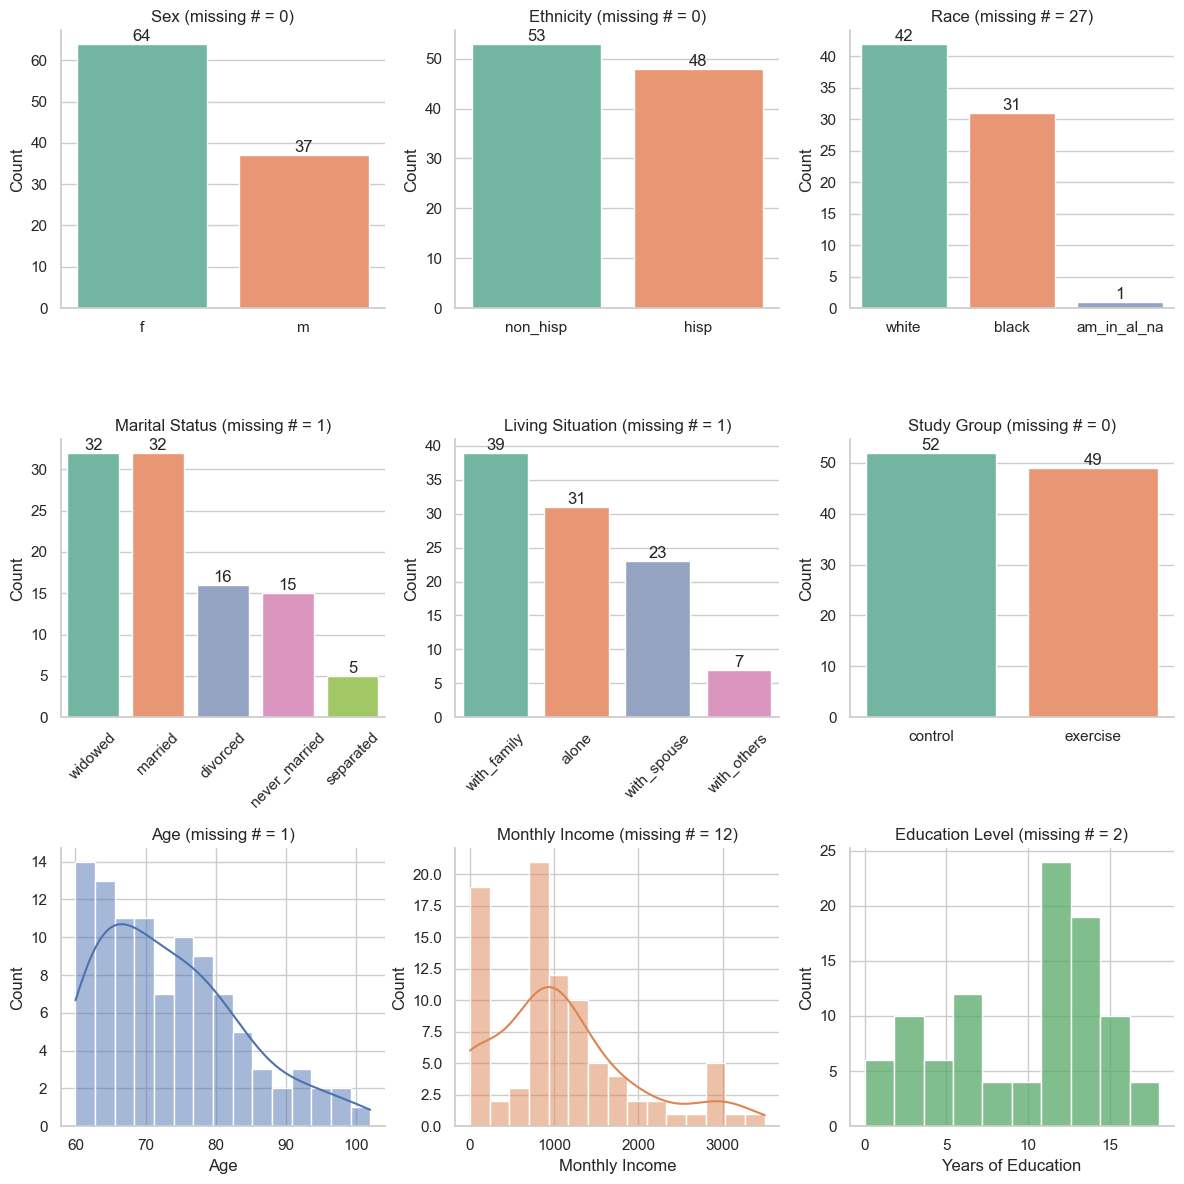

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(12, 12), dpi=100)
cat_vars = [
    ("sex", "Sex"),
    ("ethnicity", "Ethnicity"),
    ("race", "Race"),
    ("marital_status", "Marital Status"),
    ("living_situation", "Living Situation"),
    ("group", "Study Group"),
]

for idx, (col, title) in enumerate(cat_vars):
    ax = axes[idx // 3, idx % 3]
    counts = df_subject[col].value_counts()
    missing_count = df_subject[col].isna().sum()
    sns.barplot(x=counts.index, y=counts.values, ax=ax, palette="Set2")
    ax.set_title(f"{title} (missing # = {missing_count})")
    ax.set_ylabel("Count")
    ax.set_xlabel("")
    if col in ["marital_status", "living_situation"]:
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.tick_params(axis='x', rotation=0)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')
    sns.despine(ax=ax)

# Age
age_missing = df_subject["age"].isna().sum()
sns.histplot(df_subject["age"].dropna(), bins=15, kde=True, ax=axes[2, 0], color="#4c72b0")
axes[2, 0].set_title(f"Age (missing # = {age_missing})")
axes[2, 0].set_xlabel("Age")
sns.despine(ax=axes[2, 0])

# Monthly income
income_missing = df_subject["monthly_income"].isna().sum()
sns.histplot(df_subject["monthly_income"].dropna(), bins=15, kde=True, ax=axes[2, 1], color="#dd8452")
axes[2, 1].set_title(f"Monthly Income (missing # = {income_missing})")
axes[2, 1].set_xlabel("Monthly Income")
sns.despine(ax=axes[2, 1])

# Education
education_missing = df_subject["education"].isna().sum()
sns.histplot(df_subject["education"].dropna(), bins=10, kde=False, ax=axes[2, 2], color="#55a868")
axes[2, 2].set_title(f"Education Level (missing # = {education_missing})")
axes[2, 2].set_xlabel("Years of Education")
sns.despine(ax=axes[2, 2])

plt.tight_layout()
plt.show()

In [23]:
# Convert date column to datetime format first
df_visit["date"] = pd.to_datetime(df_visit["date"])

# Now use between with string dates
df_visit[df_visit["date"].between("2020-01-01", "2021-01-01", inclusive="both")]

,subject_id,visit_id,date
44,MDE011,4,2020-06-08
60,MDE014,5,2020-09-26
67,MDE016,2,2020-04-20
68,MDE016,3,2020-06-01
79,MDE019,3,2020-05-26
84,MDE020,3,2020-05-26
91,MDE021,5,2020-11-02
95,MDE023,3,2020-06-29
101,MDE024,4,2020-07-27
104,MDE025,2,2020-06-09


In [44]:
plt.figure(figsize=(30, 25), dpi=300)
sns.scatterplot(
    data=df_measurement,
    x='date',
    y='subject_id',
    s=13,
    alpha=0.7,
    label='Measurement'
)
plt.xlabel('Date')
plt.ylabel('Subject ID')
plt.title('Measurement Days')

subjects = sorted(df_measurement['subject_id'].unique())
plt.ylim(subjects[-1], subjects[0])
plt.gca().set_ylim(plt.gca().get_ylim()[0] + 1, plt.gca().get_ylim()[1] - 1)

# Mark visit dates
plt.scatter(
    df_visit['date'],
    df_visit['subject_id'],
    color='red',
    marker='*',
    s=50,
    label='Visit Date'
)

plt.legend()
plt.tight_layout()
plt.show()

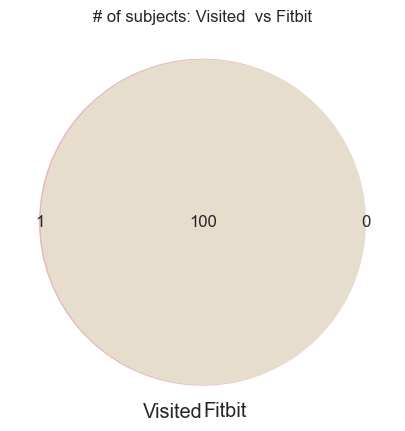

{'MDE043'} was visited but not no fitbit measurement data


In [65]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

visited_subjects = set(df_visit["subject_id"].unique())
measured_subjects = set(df_measurement["subject_id"].unique())
both_subjects = visited_subjects & measured_subjects

# venn diagram
plt.figure(figsize=(5, 5))
venn2([visited_subjects, measured_subjects], set_labels=('Visited', 'Fitbit'))
plt.title('# of subjects: Visited  vs Fitbit')
plt.show()

len(df_measurement["subject_id"].unique()) # number of subjects with fitbit measurements
len(df_visit["subject_id"].unique()) # number of subjects with visits


print(f"{visited_subjects - measured_subjects} was visited but not no fitbit measurement data")


In [93]:
subject = "MDE009"
(measurement.DailyMeasurement & f"subject_id = '{subject}'").fetch(format="frame").reset_index()

,subject_id,date,total_steps,total_distance,sedentary_minutes,calories_bmr
0,MDE009,2021-11-28,0.0,0.00,1014.0,979.0
1,MDE009,2021-11-29,0.0,0.00,985.0,803.0
2,MDE009,2021-12-07,1433.0,1.04,1440.0,1174.0
3,MDE009,2021-12-08,1116.0,0.81,1440.0,1174.0
4,MDE009,2021-12-09,1355.0,0.99,1440.0,1174.0
5,MDE009,2021-12-10,1185.0,0.86,1440.0,1174.0
6,MDE009,2021-12-11,1817.0,1.32,1440.0,1174.0
7,MDE009,2021-12-12,1844.0,1.34,1440.0,1174.0
8,MDE009,2021-12-13,984.0,0.72,1440.0,1174.0
9,MDE009,2021-12-14,1002.0,0.73,1440.0,1174.0


In [94]:
visit.Visit & f"subject_id = '{subject}'"


"subject_id Subject identifier (e.g., MDE001)",visit_id Visit number (1-5),date Visit date
MDE009,1,2021-11-29
MDE009,2,2022-01-06
MDE009,3,2022-01-25
MDE009,4,2022-02-14
MDE009,5,2022-04-27


In [79]:
df_measurement.where(df_measurement["subject_id"] == "MDE001").tail(10)

,subject_id,date,total_steps,total_distance,sedentary_minutes,calories_bmr
14277,NaN,NaN,NaN,NaN,NaN,NaN
14278,NaN,NaN,NaN,NaN,NaN,NaN
14279,NaN,NaN,NaN,NaN,NaN,NaN
14280,NaN,NaN,NaN,NaN,NaN,NaN
14281,NaN,NaN,NaN,NaN,NaN,NaN
14282,NaN,NaN,NaN,NaN,NaN,NaN
14283,NaN,NaN,NaN,NaN,NaN,NaN
14284,NaN,NaN,NaN,NaN,NaN,NaN
14285,NaN,NaN,NaN,NaN,NaN,NaN
14286,NaN,NaN,NaN,NaN,NaN,NaN


Number of subjects with fitbit measurements: 100
Number of subjects with visits: 101
